In [10]:


import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [1]:
import pyodbc
import yfinance as yf
import pandas as pd

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)
cursor = cnxn.cursor()

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2016-01-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2021-10-01"  # Enddatum, bis zu dem Daten überprüft werden sollen

# Daten aus der Tabelle in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE timestamp >= ? AND timestamp <= ?"
df = pd.read_sql(select_query, cnxn, params=(start_date, end_date))

# Verbindung schließen
cursor.close()
cnxn.close()

# DataFrame anzeigen
print(df.head())

   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_9228\2714029820.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(select_query, cnxn, params=(start_date, end_date))


In [2]:
df.head()

,id,timestamp,open,high,low,close,volume
0,1,2016-01-04,25.652500,26.342501,25.500000,26.337500,270597600
1,2,2016-01-05,26.437500,26.462500,25.602501,25.677500,223164000
2,3,2016-01-06,25.139999,25.592501,24.967501,25.174999,273829600
3,4,2016-01-07,24.670000,25.032499,24.107500,24.112499,324377600
4,5,2016-01-08,24.637501,24.777500,24.190001,24.240000,283192000


In [3]:
df.tail()

,id,timestamp,open,high,low,close,volume
1443,1444,2021-09-27,145.470001,145.960007,143.820007,145.369995,74150700
1444,1445,2021-09-28,143.250000,144.750000,141.690002,141.910004,108972300
1445,1446,2021-09-29,142.470001,144.449997,142.029999,142.830002,74602000
1446,1447,2021-09-30,143.660004,144.380005,141.279999,141.500000,89056700
1447,1448,2021-10-01,141.899994,142.919998,139.110001,142.649994,94639600


In [8]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:


## Drop last 2 rows
df.drop(106,axis=0,inplace=True)



In [10]:


df.tail()



,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [11]:
df.drop(105,axis=0,inplace=True)

In [12]:


df.tail()



,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:


# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])



In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [4]:
df.set_index('timestamp',inplace=True)

In [5]:
df.head()

,id,open,high,low,close,volume
timestamp,,,,,,
2016-01-04,1,25.652500,26.342501,25.500000,26.337500,270597600
2016-01-05,2,26.437500,26.462500,25.602501,25.677500,223164000
2016-01-06,3,25.139999,25.592501,24.967501,25.174999,273829600
2016-01-07,4,24.670000,25.032499,24.107500,24.112499,324377600
2016-01-08,5,24.637501,24.777500,24.190001,24.240000,283192000


In [6]:
df.describe()

,id,open,high,low,close,volume
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1.448000e+03
mean,724.500000,62.603047,63.268320,61.951183,62.638653,1.280759e+08
std,418.145908,37.331576,37.766873,36.835261,37.312130,5.995885e+07
min,1.000000,22.500000,22.917500,22.367500,22.584999,4.544800e+07
25%,362.750000,36.882499,37.190001,36.497500,36.972499,8.817688e+07
50%,724.500000,47.312500,47.672499,46.892500,47.230000,1.115516e+08
75%,1086.250000,79.171249,79.895000,78.510000,79.423126,1.487027e+08
max,1448.000000,156.979996,157.259995,154.389999,156.690002,5.334788e+08


<Axes: xlabel='close'>

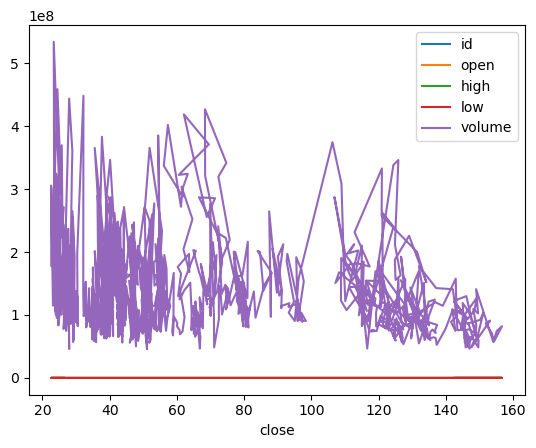

In [8]:
df.plot("close")

In [11]:


### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller



In [12]:
test_result=adfuller(df['close'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['close'])

ADF Test Statistic : 0.6144106971855642
p-value : 0.9879654942121463
#Lags Used : 24
Number of Observations Used : 1423
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
df['Close First Difference'] = df['close'] - df['close'].shift(1)

In [18]:
df['close'].shift(1)

timestamp
2016-01-04           NaN
2016-01-05     26.337500
2016-01-06     25.677500
2016-01-07     25.174999
2016-01-08     24.112499
                 ...    
2021-09-27    146.919998
2021-09-28    145.369995
2021-09-29    141.910004
2021-09-30    142.830002
2021-10-01    141.500000
Name: close, Length: 1448, dtype: float64

In [19]:
df['Seasonal First Difference']=df['close']-df['close'].shift(12)

In [20]:
df.head(14)

,id,open,high,low,close,volume,Close First Difference,Seasonal First Difference
timestamp,,,,,,,,
2016-01-04,1,25.652500,26.342501,25.500000,26.337500,270597600,NaN,NaN
2016-01-05,2,26.437500,26.462500,25.602501,25.677500,223164000,-0.660000,NaN
2016-01-06,3,25.139999,25.592501,24.967501,25.174999,273829600,-0.502501,NaN
2016-01-07,4,24.670000,25.032499,24.107500,24.112499,324377600,-1.062500,NaN
2016-01-08,5,24.637501,24.777500,24.190001,24.240000,283192000,0.127501,NaN
2016-01-11,6,24.742500,24.764999,24.334999,24.632500,198957600,0.392500,NaN
2016-01-12,7,25.137501,25.172501,24.709999,24.990000,196616800,0.357500,NaN
2016-01-13,8,25.080000,25.297501,24.325001,24.347500,249758400,-0.642500,NaN
2016-01-14,9,24.490000,25.120001,23.934999,24.879999,252680400,0.532499,NaN


In [21]:


## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())



ADF Test Statistic : -5.682811826697094
p-value : 8.41017503693553e-07
#Lags Used : 24
Number of Observations Used : 1411
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='timestamp'>

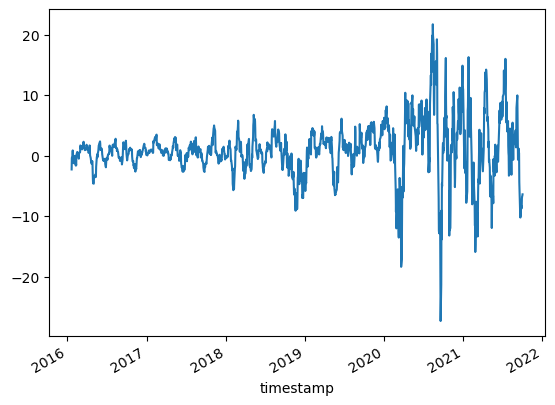

In [22]:
df['Seasonal First Difference'].plot()

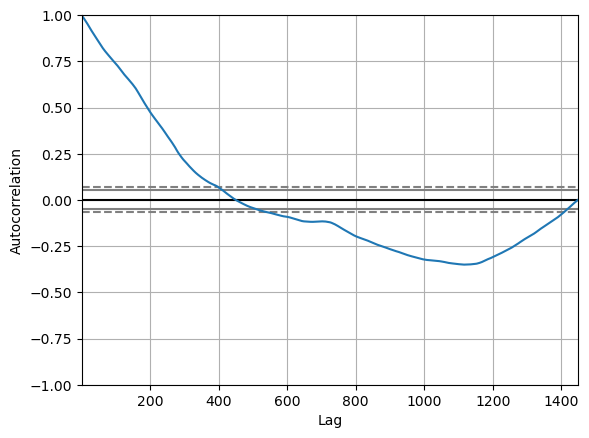

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'])
plt.show()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


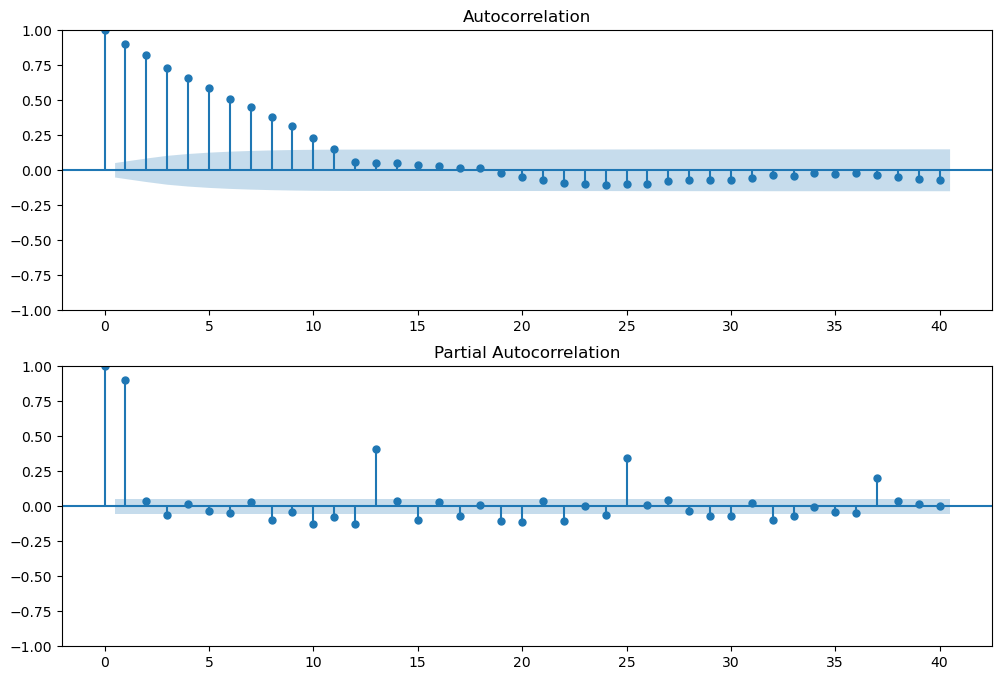

In [24]:



fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)





In [40]:


# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA



In [29]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['close'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1448
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2571.005
Date:                Wed, 21 Jun 2023   AIC                           5146.010
Time:                        19:30:55   BIC                           5156.565
Sample:                             0   HQIC                          5149.949
                               - 1448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1019      0.014     -7.229      0.000      -0.130      -0.074
sigma2         2.0456      0.032     64.017      0.000       1.983       2.108
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5420.26
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              32.13   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='timestamp'>

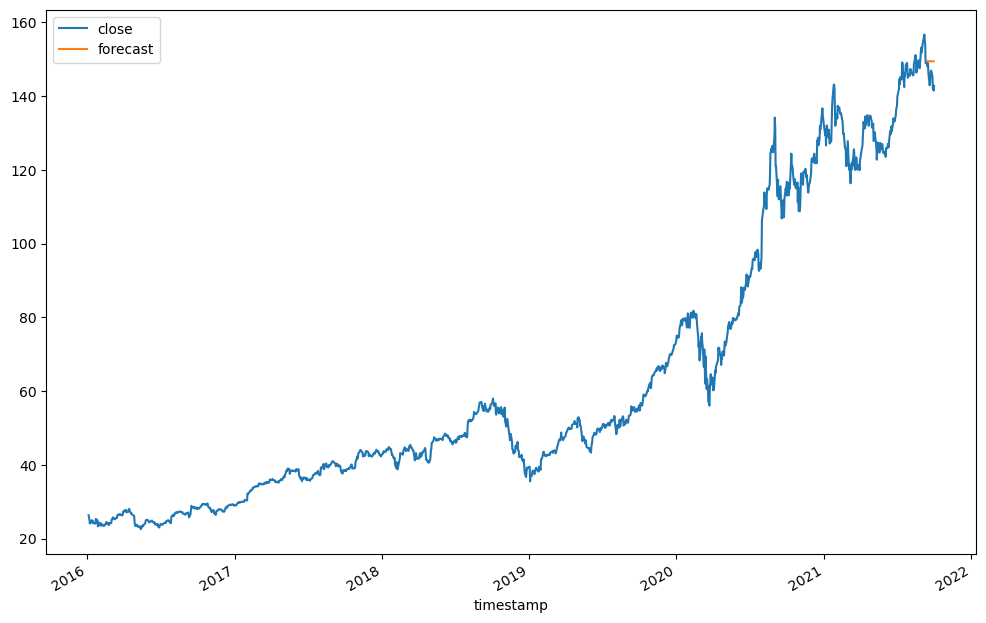

In [28]:
df['forecast']=model_fit.predict(start=1433,end=1446,dynamic=True)
df[['close','forecast']].plot(figsize=(12,8))

In [30]:
model=sm.tsa.statespace.SARIMAX(df['close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='timestamp'>

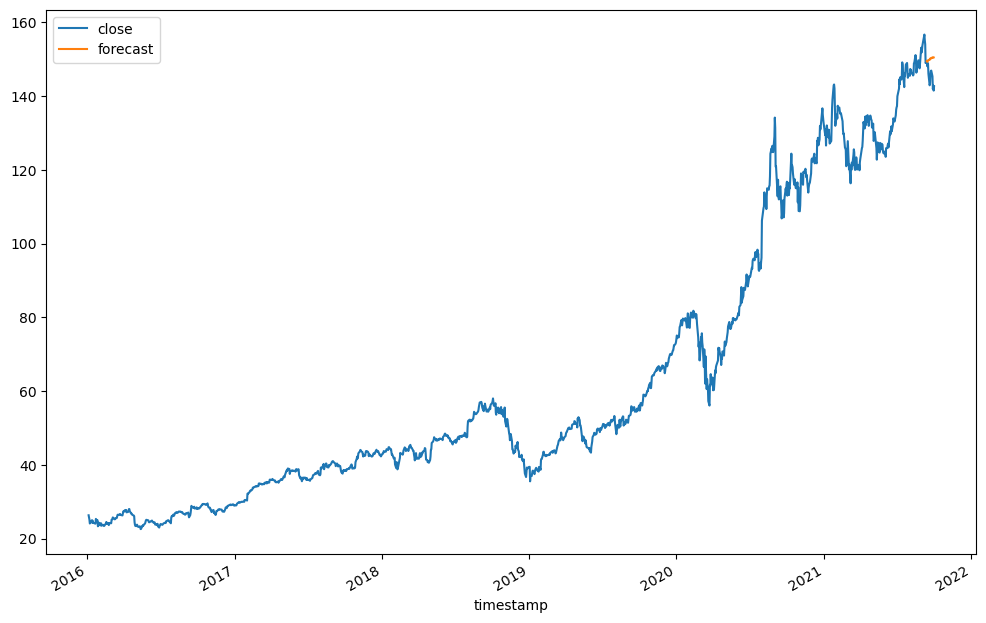

In [32]:
df['forecast']=results.predict(start=1433,end=1446,dynamic=True)
df[['close','forecast']].plot(figsize=(12,8))

In [33]:


from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]



In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.tail()


,id,open,high,low,close,volume,Close First Difference,Seasonal First Difference,forecast
2023-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

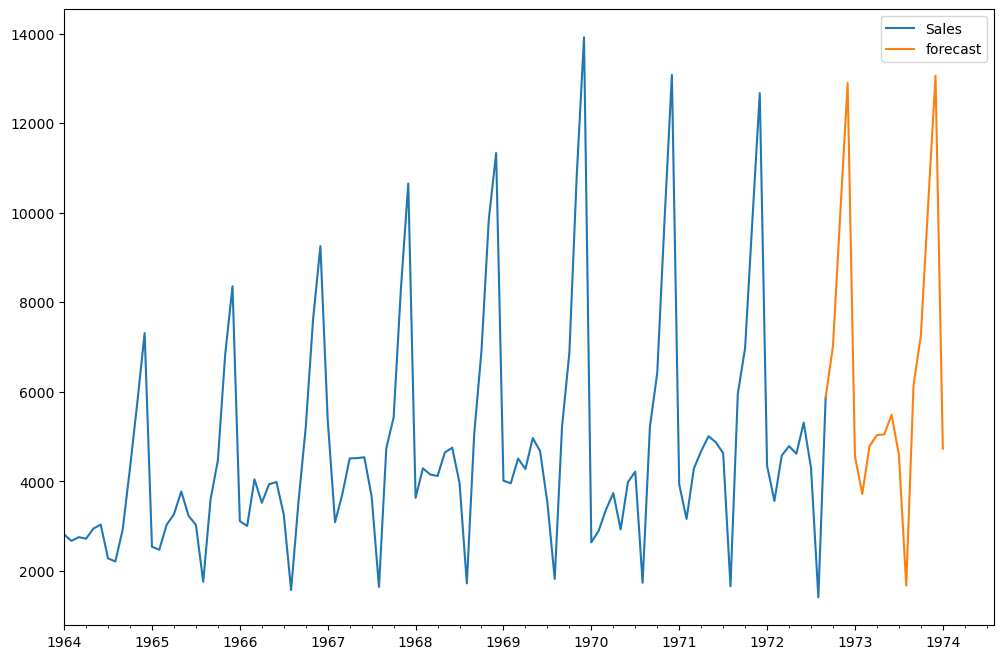

In [51]:


future_df['forecast'] = results.predict(start = 1433, end = 1446, dynamic= True)  
future_df[['close', 'forecast']].plot(figsize=(12, 8)) 



In [52]:
print(future_df)

             Sales  Sales First Difference  Seasonal First Difference  \
1964-01-01  2815.0                     NaN                        NaN   
1964-02-01  2672.0                  -143.0                        NaN   
1964-03-01  2755.0                    83.0                        NaN   
1964-04-01  2721.0                   -34.0                        NaN   
1964-05-01  2946.0                   225.0                        NaN   
...            ...                     ...                        ...   
1974-04-01     NaN                     NaN                        NaN   
1974-05-01     NaN                     NaN                        NaN   
1974-06-01     NaN                     NaN                        NaN   
1974-07-01     NaN                     NaN                        NaN   
1974-08-01     NaN                     NaN                        NaN   

            forecast  
1964-01-01       NaN  
1964-02-01       NaN  
1964-03-01       NaN  
1964-04-01       NaN  
1964-05-

In [53]:
print(future_df[['Sales', 'forecast']])

             Sales  forecast
1964-01-01  2815.0       NaN
1964-02-01  2672.0       NaN
1964-03-01  2755.0       NaN
1964-04-01  2721.0       NaN
1964-05-01  2946.0       NaN
...            ...       ...
1974-04-01     NaN       NaN
1974-05-01     NaN       NaN
1974-06-01     NaN       NaN
1974-07-01     NaN       NaN
1974-08-01     NaN       NaN

[128 rows x 2 columns]
